In [1]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
from matplotlib import pyplot
from scipy.spatial import distance

audio_data = genfromtxt('E:/ASU_CourseWork/Fall_2018/SML/Assignment/assignment_3/audioData.csv', delimiter=',')
print(audio_data.shape)


(128, 13)


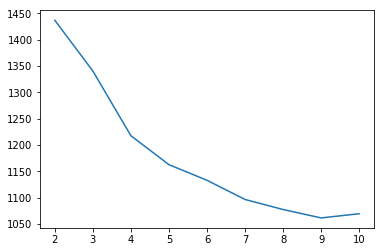

In [2]:
k_objvallist = []
for k in range(2,11):
    clusters_list = [audio_data[np.random.randint(0, 128)] for x in range(k)]
    cluster_arr = np.asarray(clusters_list)
    cluster_membership = np.zeros((128, k))

    while(True):
        cluster_membership = np.zeros((128, k))
        euclidean_distance = distance.cdist(audio_data, cluster_arr)
        indices = np.argmin(euclidean_distance, axis = 1)
    
        membership_counter = {}
        
        # get the cluster membership based on the euclidean distance
        for row_index in range(euclidean_distance.shape[0]):
            cluster_membership[row_index][indices[row_index]] = 1
    
        # updating the cluster centers
        cluster_membership = cluster_membership.T
        updated_clusters = np.dot(cluster_membership, audio_data)
        members = cluster_membership.sum(axis=1)
        for index in range(updated_clusters.shape[0]):
            updated_clusters[index] = updated_clusters[index] / members[index]
        
#         Finding out the difference between the old cluster centre and updated cluster centre
        diff_clusters = np.subtract(updated_clusters, cluster_arr)
        check = np.where(diff_clusters.any() > 0 or diff_clusters.any() < 0)
        if (check[0].size == 0):
            break
#         if (np.array_equal(updated_clusters, cluster_arr)):
        cluster_arr = updated_clusters
    
    # computing the objective function value
    k_objval = np.sum(distance.cdist(audio_data, cluster_arr).min(axis = 1))
    k_objvallist.append(k_objval)
    
pyplot.plot([x for x in range(2,11)], k_objvallist)
pyplot.show()